## Creates a pie chart for distribution of product complaints

In [1]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Only needed if you're using a Jupyter Notebook
init_notebook_mode(connected=True)

# Load the dataset
df = pd.read_csv("complaint_cleaned.csv")

# Calculate percentage of product discussions
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100, 2)

# Print the percentages
print(p_product_discussions)

# Prepare data for the pie chart
labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', 
          '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']

# Create pie chart
product_pie = go.Pie(
    labels=labels,
    values=values,
    marker=dict(colors=colors, line=dict(color='#000000', width=2))
)

# Set up layout
layout = go.Layout(title='Product Types')

# Plot
fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)


/var/folders/qz/_plh__x56hj5r6twwvlby_rc0000gn/T/ipykernel_76836/1707795966.py:9: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



Product
Credit reporting, credit repair services, or other personal consumer reports    46.22
Debt collection                                                                 17.26
Mortgage                                                                         8.79
Credit card or prepaid card                                                      7.35
Checking or savings account                                                      4.87
Student loan                                                                     2.94
Credit reporting                                                                 2.84
Money transfer, virtual currency, or money service                               2.39
Vehicle loan or lease                                                            1.79
Credit card                                                                      1.70
Bank account or service                                                          1.34
Payday loan, title loan, or personal loan     

## Creates a chart for the customer response from company

In [2]:
# Get company response counts
company_response = df['Company response to consumer'].value_counts()

# Build bar chart for customer response
customer_res_plotly = go.Bar(
    x=company_response.index.values,
    y=company_response.values,
    text='Customer Response',
    showlegend=False,
    marker=dict(
        color=company_response.values,
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.111, 'rgb(215,48,39)'], [0.222, 'rgb(244,109,67)'], 
                    [0.333, 'rgb(253,174,97)'], [0.444, 'rgb(254,224,144)'], 
                    [0.555, 'rgb(224,243,248)'], [0.666, 'rgb(171,217,233)'], 
                    [0.777, 'rgb(116,173,209)'], [0.888, 'rgb(69,117,180)'], 
                    [1.0, 'rgb(49,54,149)']],
        reversescale=True
    )
)

# Layout
layout = go.Layout(
    title='Customer Response from Company',
    xaxis=dict(title='Response Type'),
    yaxis=dict(title='Number of Complaints')
)

# Plot
fig = go.Figure(data=[customer_res_plotly], layout=layout)
iplot(fig)

## Can zero in by company

In [4]:
cross_month = pd.crosstab(df['State'], df['Company']).apply(lambda x: x / x.sum() * 100)

df_boa = pd.DataFrame(cross_month['BANK OF AMERICA, NATIONAL ASSOCIATION']).reset_index().sort_values(by="BANK OF AMERICA, NATIONAL ASSOCIATION", ascending=False).round(2)
df_boa = df_boa.rename(columns={'BANK OF AMERICA, NATIONAL ASSOCIATION': 'share of complaints'})

for col in df_boa.columns:
    df_boa[col] = df_boa[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_boa['text'] = "State Code: " + df_boa['State'] + '<br>'


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_boa['State'],
        z = df_boa['share of complaints'], 
        locationmode = 'USA-states',
        text = df_boa['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
    title = 'Most Complaints by State <br> Bank of America',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

## Tokenize, preprocess

Each of the 10000 complaints is represented by 24242 features (TF-IDF score of unigrams and bigrams)

=== LinearSVC ===


/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.




CLASSIFICATION REPORT:

                                                                              precision    recall  f1-score   support

                                                                    Mortgage       0.90      0.92      0.91       240
Credit reporting, credit repair services, or other personal consumer reports       0.89      0.92      0.90      1346
                                                             Debt collection       0.79      0.76      0.77       483
                                                 Credit card or prepaid card       0.81      0.75      0.78       215
                                                 Checking or savings account       0.85      0.84      0.84       141
                                                                Student loan       0.94      0.79      0.86        75

                                                                    accuracy                           0.86      2500
                             

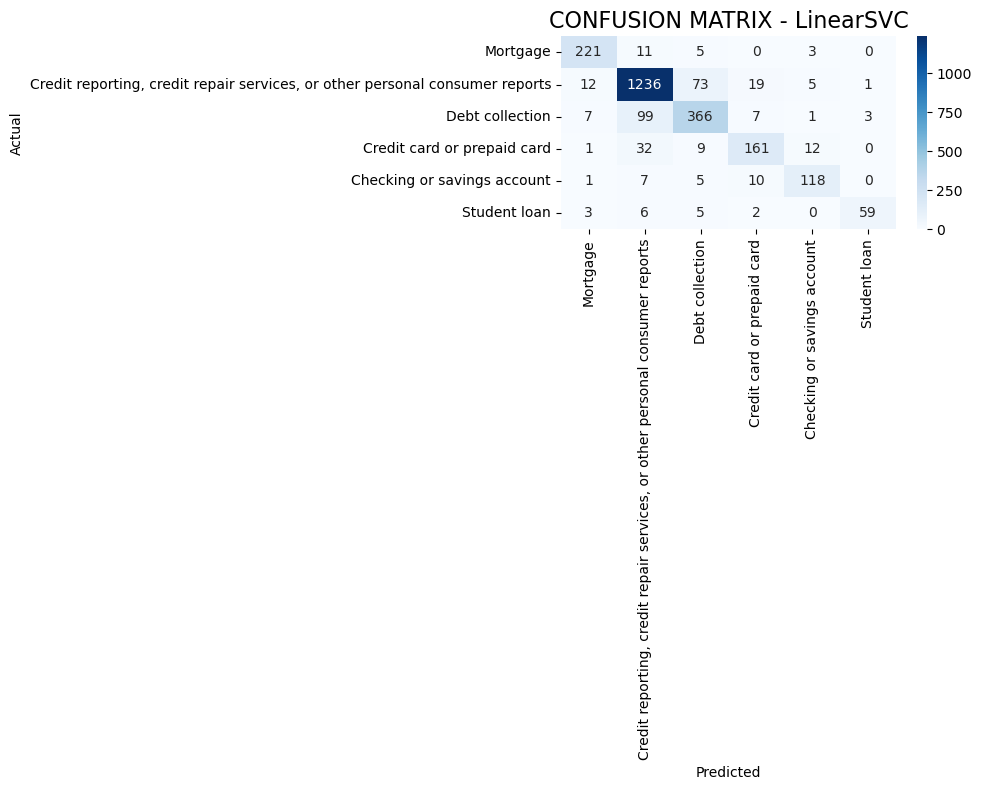


=== RandomForest ===

CLASSIFICATION REPORT:

                                                                              precision    recall  f1-score   support

                                                                    Mortgage       0.00      0.00      0.00       240
Credit reporting, credit repair services, or other personal consumer reports       0.54      1.00      0.70      1346
                                                             Debt collection       0.00      0.00      0.00       483
                                                 Credit card or prepaid card       0.00      0.00      0.00       215
                                                 Checking or savings account       0.00      0.00      0.00       141
                                                                Student loan       0.00      0.00      0.00        75

                                                                    accuracy                           0.54      2500
       

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



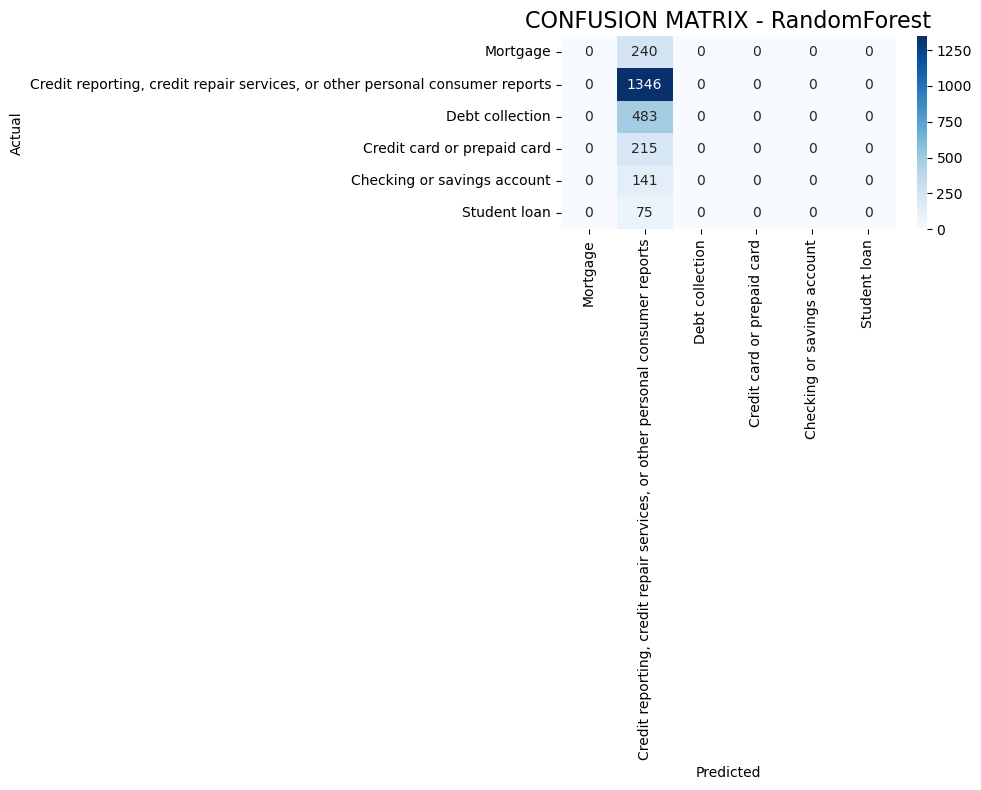


=== MultinomialNB ===

CLASSIFICATION REPORT:

                                                                              precision    recall  f1-score   support

                                                                    Mortgage       0.87      0.80      0.83       240
Credit reporting, credit repair services, or other personal consumer reports       0.72      0.98      0.83      1346
                                                             Debt collection       0.82      0.54      0.65       483
                                                 Credit card or prepaid card       0.80      0.32      0.45       215
                                                 Checking or savings account       1.00      0.33      0.50       141
                                                                Student loan       0.00      0.00      0.00        75

                                                                    accuracy                           0.75      2500
      

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



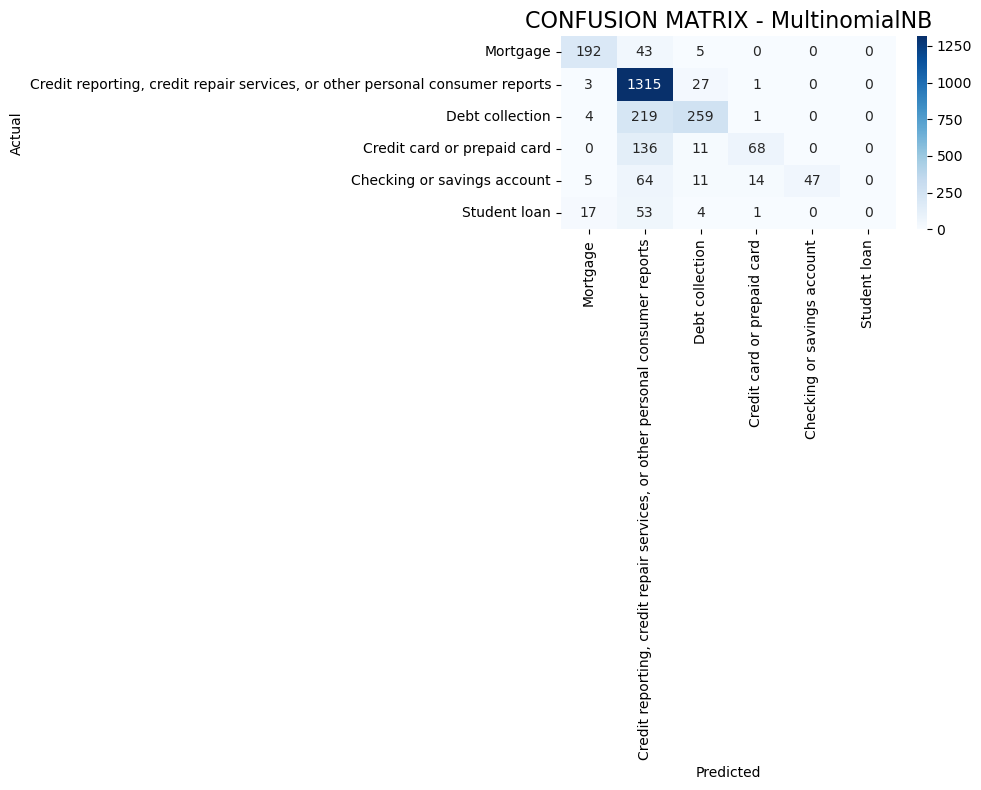


=== LogisticRegression ===


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# --- Preprocessing Function ---
def preprocessing_text(complaint):
    complaint = complaint.lower()
    complaint = re.sub(r'[^a-zA-Z\s]', '', complaint)
    complaint = re.sub(r'[x]{2,}', '', complaint)
    return complaint

selected_products = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Debt collection",
    "Mortgage",
    "Credit card or prepaid card",
    "Checking or savings account",
    "Student loan"
]

df2 = df[df['Product'].isin(selected_products)][['Consumer complaint narrative', 'Product']].dropna()
df2 = df2.rename(columns={'Consumer complaint narrative': 'Consumer_complaint'})

# --- Sample 10,000 rows ---
df2 = df2.sample(n=10000, random_state=42)

# --- Map Product to Category ID ---
category_id_df = df2[['Product']].drop_duplicates().reset_index(drop=True)
category_id_df['category_id'] = category_id_df.index

df2 = df2.merge(category_id_df, on='Product')

# --- Apply Preprocessing ---
df2['Consumer_complaint'] = df2['Consumer_complaint'].apply(preprocessing_text)

# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df2.Consumer_complaint).toarray()
labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" % features.shape)

# --- Stratified Train-Test Split ---
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    features, labels, df2.index, 
    test_size=0.25, 
    stratify=labels, 
    random_state=1
)

# --- Define Models ---
models = {
    'LinearSVC': LinearSVC(),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1),
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=1)
}

# --- Train and Evaluate Each Model ---
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nCLASSIFICATION REPORT:\n")
    print(metrics.classification_report(y_test, y_pred, target_names=category_id_df['Product'].values))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
                xticklabels=category_id_df['Product'].values, 
                yticklabels=category_id_df['Product'].values)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"CONFUSION MATRIX - {name}", size=16)
    plt.tight_layout()
    plt.show()
